## The goal of this notebook is to explore correlations in the stores_train dataset

## What happens?
- From the scatter plot, there seems to be a clear correlation between chain_name and revenue
- The package dython is used to get correlation between numerical and categorical data.
- NOTE: Dython requieres matplotlib>=3.4.3

There are 307 unique chain_names

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
from dython.nominal import associations
import numpy as np

In [10]:
df = pd.read_csv("../../own_data/all_with_stores_pop.csv")
df.set_index(["dataset", "range_index"], inplace=True)
df = df.loc["train"]
df.set_index("store_id", inplace=True)

In [11]:
df.columns

Index(['store_name', 'grunnkrets_id', 'address', 'lat', 'lon', 'chain_name',
       'mall_name', 'revenue', 'other_stores_1000', 'other_stores_100',
       'other_stores_50', 'other_stores_250', 'buss_stops_1000',
       'buss_stops_300', 'grunnkrets_1', 'distance_closest_busstop',
       'busstop_id', 'district_name', 'municipality_name', 'area_km2',
       'couple_children_0_to_5_years', 'couple_children_18_or_above',
       'couple_children_6_to_17_years', 'couple_without_children_x',
       'single_parent_children_0_to_5_years',
       'single_parent_children_18_or_above',
       'single_parent_children_6_to_17_years', 'singles_x', 'all_households',
       'singles_y', 'couple_without_children_y', 'couple_with_children',
       'other_households', 'single_parent_with_children', 'lv1', 'lv2', 'lv3',
       'lv4', 'stopplace_type', 'importance_level', 'side_placement',
       'num_of_buss_stops_closer_that_1000_to_busstop',
       'district_age_0-14_distribution', 'district_age_15-34

In [39]:
df = df[["lv1_population_district_div_count_stores", 'lv2_population_district_div_count_stores', 'lv3_population_district_div_count_stores', "lv4_population_district_div_count_stores",
'lv1_population_municipality_div_count_stores', 'lv2_population_municipality_div_count_stores','lv3_population_municipality_div_count_stores',
'lv4_population_municipality_div_count_stores', "revenue"]]

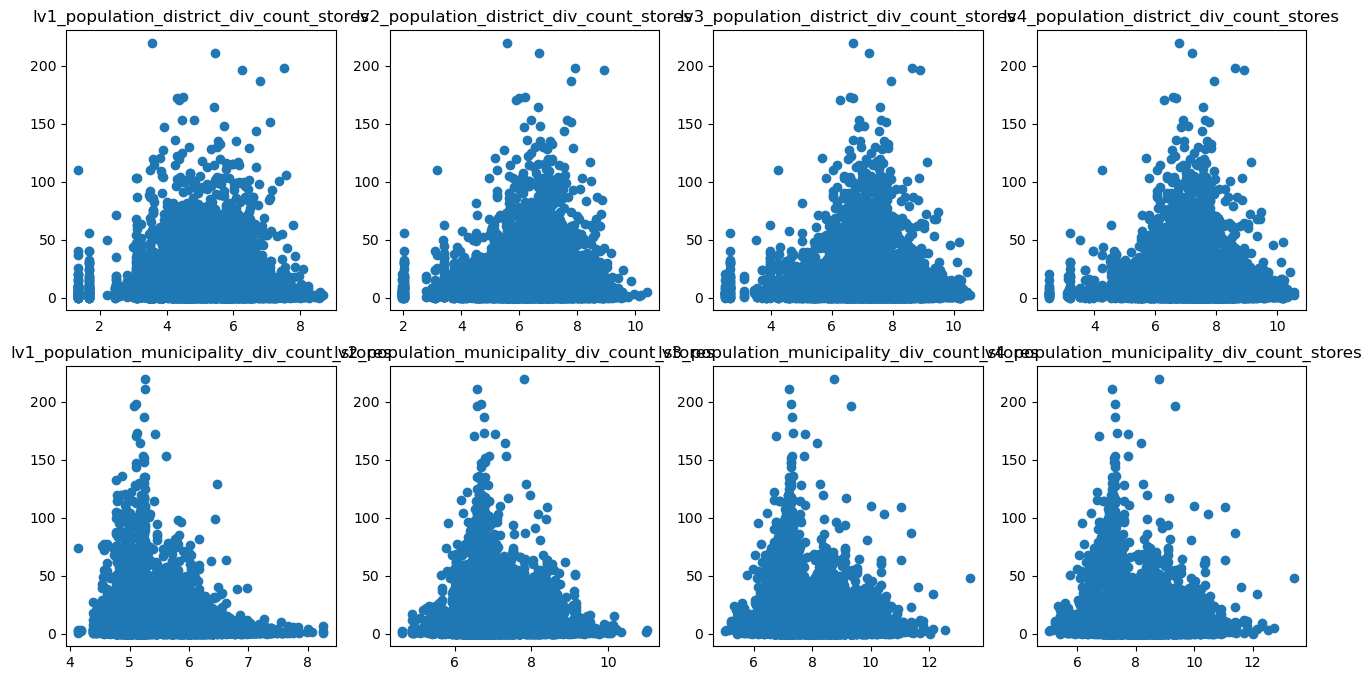

In [44]:
columns = ["lv1_population_district_div_count_stores", 'lv2_population_district_div_count_stores', 'lv3_population_district_div_count_stores', "lv4_population_district_div_count_stores", 'lv1_population_municipality_div_count_stores', 'lv2_population_municipality_div_count_stores','lv3_population_municipality_div_count_stores','lv4_population_municipality_div_count_stores']
fig, axs = plt.subplots(2,4, figsize=(16,8))

for i, name in enumerate(columns):
    axs[i//4][i%4].scatter(np.log1p(df[name]), df.revenue)
    axs[i//4][i%4].set_title(name)

In [3]:
df = pd.read_csv("../../data/stores_train.csv")

In [4]:
df.head(5)

,store_id,year,store_name,plaace_hierarchy_id,sales_channel_name,grunnkrets_id,address,lat,lon,chain_name,mall_name,revenue
0,983540538-974187930-44774,2016,MCDONALD'S BRAGERNES TORG MAGASINET,1.1.1.0,Hamburger restaurants,6020303,BRAGERNES TORG 13,59.743104,10.204928,MCDONALDS,Magasinet Drammen,17.998
1,987074191-973117734-44755,2016,MCDONALD'S KLINGENBERGGATA,1.1.1.0,Hamburger restaurants,3010306,NaN,59.913759,10.734031,MCDONALDS,NaN,23.828
2,984890265-981157303-64491,2016,BURGER KING HØNEFOSS,1.1.1.0,Hamburger restaurants,6050102,KONG RINGS GATE 1,60.164751,10.254656,BURGER KING,Kuben Hønefoss,16.099
3,914057442-992924179-126912,2016,BURGER KING GLASSHUSPASSASJEN,1.1.1.0,Hamburger restaurants,18040102,STORGATA 12,67.283669,14.379796,BURGER KING,Glasshuspassasjen,9.296
4,913018583-913063538-668469,2016,BURGER KING TILLERTORGET,1.1.1.0,Hamburger restaurants,16017414,NaN,63.358068,10.374832,BURGER KING,Tillertorget,4.528


In [7]:
%matplotlib qt 
df_temp = df[~df.chain_name.isna()]
#df_temp = df_temp[df_temp["chain_name"] == "FLOYD BUTIKKDRIFT"]
plt.scatter(df_temp.chain_name, df_temp.revenue)

In [8]:
df_temp = df.drop(columns=["year", "store_id", "lat", "lon", "address", "store_name"])
associations(df_temp, filename="../../figs/eda/stores_train_correlations.png", figsize=(10,10))

{'corr':                      plaace_hierarchy_id  sales_channel_name  grunnkrets_id  \
 plaace_hierarchy_id             1.000000            1.000000       0.165449   
 sales_channel_name              1.000000            1.000000       0.165449   
 grunnkrets_id                   0.165449            0.165449       1.000000   
 chain_name                      0.516161            0.516161       0.240040   
 mall_name                       0.078511            0.078511       0.423671   
 revenue                         0.570947            0.570947       0.014588   
 
                      chain_name  mall_name   revenue  
 plaace_hierarchy_id    0.516161   0.078511  0.570947  
 sales_channel_name     0.516161   0.078511  0.570947  
 grunnkrets_id          0.240040   0.423671  0.014588  
 chain_name             1.000000   0.182611  0.774422  
 mall_name              0.182611   1.000000  0.276967  
 revenue                0.774422   0.276967  1.000000  ,
 'ax': <AxesSubplot:>}

In [13]:
df_test = pd.read_csv("../../own_data/without_grunnkrets.csv").set_index(["dataset", "range_index"])
df_test = df_test.drop(columns=["store_id", "address", "store_name"])
df_test = df_test.loc["train"]
associations(df_test, filename="../../figs/eda/stores_train_correlations_all.png", figsize=(10,10))

KeyError: 'train'